In [14]:
from keras.datasets import imdb
from keras import preprocessing

In [15]:
max_features = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [16]:
# turns the lists of integers into a 2D integer tensor of shape (sample, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


In [17]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten()) # flattens the 3D tensor of embedding into a 2D tensor of shape (shamples, maxlen*8)
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 200, 8)            80000     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 1601      
Total params: 81,601
Trainable params: 81,601
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, 
                   epochs=10,
                   batch_size=32,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 5s 254us/step - loss: 0.5992 - acc: 0.6914 - val_loss: 0.4071 - val_acc: 0.8398
Epoch 2/10
20000/20000 [==============================] - 4s 211us/step - loss: 0.3118 - acc: 0.8780 - val_loss: 0.2983 - val_acc: 0.8782
Epoch 3/10
20000/20000 [==============================] - 4s 219us/step - loss: 0.2362 - acc: 0.9078 - val_loss: 0.2833 - val_acc: 0.8852
Epoch 4/10
20000/20000 [==============================] - 4s 215us/step - loss: 0.2022 - acc: 0.9231 - val_loss: 0.2778 - val_acc: 0.8894
Epoch 5/10
20000/20000 [==============================] - 4s 219us/step - loss: 0.1794 - acc: 0.9320 - val_loss: 0.2804 - val_acc: 0.8870
Epoch 6/10
20000/20000 [==============================] - 4s 213us/step - loss: 0.1619 - acc: 0.9384 - val_loss: 0.2845 - val_acc: 0.8884
Epoch 7/10
20000/20000 [==============================] - 4s 217us/step - loss: 0.1446 - acc: 0.9465 - val_loss: 0.2903 - v

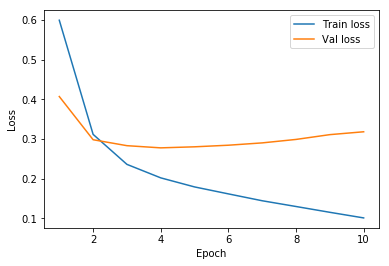

In [19]:
# plot loss
import matplotlib.pyplot as plt
epochs = range(1, 11)
plt.plot(epochs, history.history['loss'], label='Train loss')
plt.plot(epochs, history.history['val_loss'], label='Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()